In [88]:
# Import necessary libraries
import re
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

# Download NLTK resources (only needed once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saisa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saisa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saisa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [89]:
# Load the SMS spam dataset
filepath = 'sms_spam_collection/SMSSpamCollection'
sms_data = pd.read_csv(filepath, sep='\t', header=None, names=['label', 'message'])

In [90]:
# Preprocess the data: Convert labels to binary values (0 for ham, 1 for spam)
sms_data['label'] = sms_data['label'].map({'ham': 0, 'spam': 1})

# Add a new column for message length
sms_data['message_length'] = sms_data['message'].apply(len)

In [91]:
sms_data

,label,message,message_length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will ü b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [92]:
# Check for missing values
missing_values = sms_data.isnull().sum()
print(missing_values)

label             0
message           0
message_length    0
dtype: int64


In [93]:
# Check data types
data_types = sms_data.dtypes
print(data_types)

label              int64
message           object
message_length     int64
dtype: object


### EDA

Is there any difference between the lengths of the Spam and Ham?

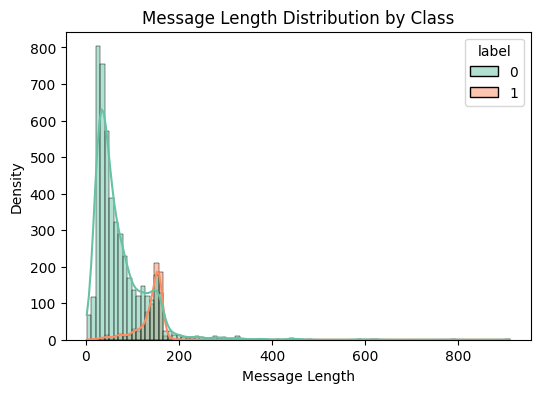

In [94]:
# Add message length column
sms_data['message_length'] = sms_data['message'].apply(len)

# Plot message length distribution
plt.figure(figsize=(6, 4))
sns.histplot(data=sms_data, x='message_length', hue='label', kde=True, palette='Set2')
plt.title('Message Length Distribution by Class')
plt.xlabel('Message Length')
plt.ylabel('Density')
plt.show()


Are the classes balanced?

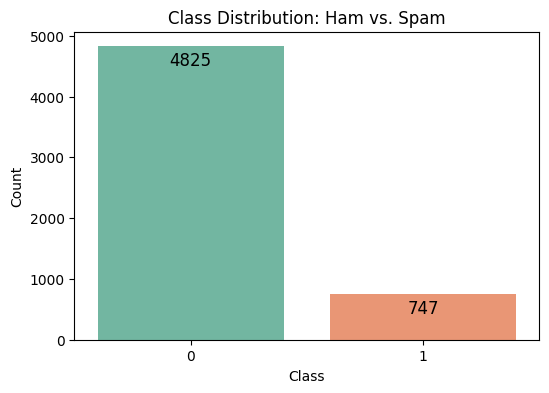

In [95]:
# Count the occurrences of each class
class_counts = sms_data['label'].value_counts()

# Create the bar plot
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black',
                xytext=(0, -10), textcoords='offset points')

# Set plot title and labels
plt.title('Class Distribution: Ham vs. Spam')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the plot
plt.show()

How do the word distributions differ between spam and ham messages?

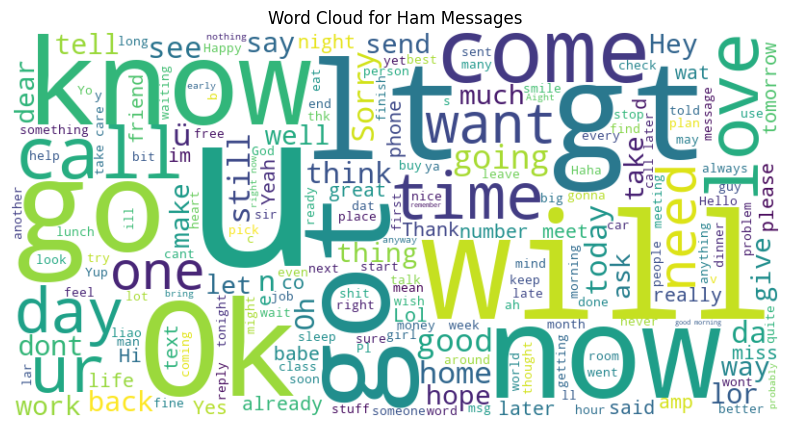

In [96]:
# Generate word clouds for ham and spam messages
ham_words = ' '.join(sms_data[sms_data['label'] == 0]['message'])
spam_words = ' '.join(sms_data[sms_data['label'] == 1]['message'])

ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)

# Plot the word cloud for ham messages
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

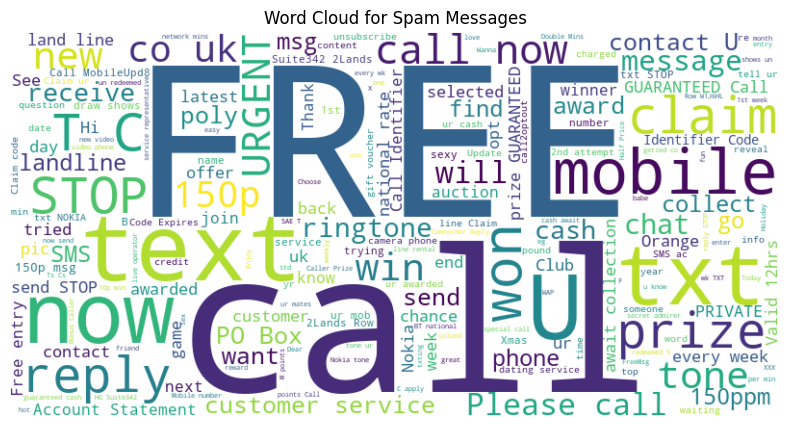

In [97]:
# Plot the word cloud for spam messages
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

- **Ham Messages**: The word cloud displays a balanced mix of everyday conversational words, such as 'ok', 'come', 'ok', 'lt', 'gt', 'know', and 'love'. This indicates that 'ham' messages are typically personal and social in nature.

- **Spam Messages**: The word cloud shows a concentration of promotional terms like 'free', 'prize', 'win', 'claim', 'urgent', and 'award'. This suggests that 'spam' messages are often marketing or scam-related, aiming to attract attention through enticing offers.

### Preprocessing

In [98]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Preprocess a single text message:
    1. Convert to lowercase
    2. Tokenize the text
    3. Remove stopwords
    4. Lemmatize the tokens
    5. Join tokens back into a string
    """
    # Convert to lowercase
    text = text.lower()
    
     # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back into a string
    return ' '.join(tokens)

# Apply preprocessing to the 'message' column
sms_data['message'] = sms_data['message'].apply(preprocess_text)

In [99]:
sms_data

,label,message,message_length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts st ...,155
3,0,u dun say early hor u c already say,49
4,0,nah dont think go usf life around though,61
...,...,...,...
5567,1,nd time tried contact u u pound prize claim ea...,160
5568,0,b going esplanade fr home,36
5569,0,pity mood soany suggestion,57
5570,0,guy bitching acted like id interested buying s...,125


In [100]:
# Split the data into train (70%), validation (15%), and test (15%) sets
train_data, temp_data = train_test_split(
    sms_data, 
    train_size=0.7, 
    random_state=42, 
    stratify=sms_data['label']
)
val_data, test_data = train_test_split(
    temp_data, 
    test_size=0.5, 
    random_state=42, 
    stratify=temp_data['label']
)

# Save the splits to CSV files
train_data.to_csv('datasets_processed/train.csv', index=False)
val_data.to_csv('datasets_processed/validation.csv', index=False)
test_data.to_csv('datasets_processed/test.csv', index=False)

# Print the shapes of the splits
print(f"Train data shape: {train_data.shape}")
print(f"Validation data shape: {val_data.shape}")
print(f"Test data shape: {test_data.shape}")


Train data shape: (3900, 3)
Validation data shape: (836, 3)
Test data shape: (836, 3)
